In [1]:
import numpy as np
from scipy.spatial.distance import pdist, squareform
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.colors as mcolors
import pandas as pd
import random

In [2]:
# Function to find the length of the longest common subsequence of
# sequences `X[0…m-1]` and `Y[0…n-1]`
def lcs(X, Y, m, n):
 
    # return if the end of either sequence is reached
    if m == 0 or n == 0:
        return 0
 
    # if the last character of `X` and `Y` matches
    if X[m - 1] == Y[n - 1]:
        return lcs(X, Y, m - 1, n - 1) + 1
 
    # otherwise, if the last character of `X` and `Y` don't match
    return max(lcs(X, Y, m, n - 1), lcs(X, Y, m - 1, n))

In [3]:
X = "HAPPY"
Y = "UNHAPPY"
print("The length of the LCS is", lcs(X, Y, len(X), len(Y)))

The length of the LCS is 5


In [4]:
def custom_metric(x, y):
    lx = len(x)
    ly = len(y)
    d_ = lcs(x, y, lx, ly)
    maxl = max(lx, ly)
    return maxl - d_

In [5]:
custom_metric(X, Y)

2

In [6]:
df = pd.read_csv('data/kindness.csv', header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
0,kindness,kindness,10,8,13,3,13,4,18,18,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1,kindness,kindness,10,8,13,3,13,4,18,18,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2,kindness,kindness,10,8,13,3,13,4,18,18,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,kindness,kindness,10,8,13,3,13,4,18,18,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,kindness,kindness,10,8,13,3,13,4,18,18,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
5,kindness,kimdmess,10,8,12,3,12,4,18,18,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
6,kindness,kindness,10,8,13,3,13,4,18,18,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
7,kindness,kindness,10,8,13,3,13,4,18,18,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
8,kindness,kindness,10,8,13,3,13,4,18,18,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
9,kindness,kindness,10,8,13,3,13,4,18,18,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [7]:
he = df.loc[:, range(2, 9)]
hee = PCA(n_components=2).fit_transform(he)
hee

array([[-8.11496856e-01, -8.72364291e-02],
       [-8.11496856e-01, -8.72364291e-02],
       [-8.11496856e-01, -8.72364291e-02],
       [-8.11496856e-01, -8.72364291e-02],
       [-8.11496856e-01, -8.72364291e-02],
       [-8.21870730e-01,  1.31991460e+00],
       [-8.11496856e-01, -8.72364291e-02],
       [-8.11496856e-01, -8.72364291e-02],
       [-8.11496856e-01, -8.72364291e-02],
       [-8.11496856e-01, -8.72364291e-02],
       [-8.11496856e-01, -8.72364291e-02],
       [-8.11496856e-01, -8.72364291e-02],
       [-8.11496856e-01, -8.72364291e-02],
       [-8.11496856e-01, -8.72364291e-02],
       [-8.16650850e-01, -1.86820273e-01],
       [ 1.21879807e+01,  9.79251397e-04]])

In [19]:
plt.style.use('dark_background')
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 14}
matplotlib.rc('font', **font)

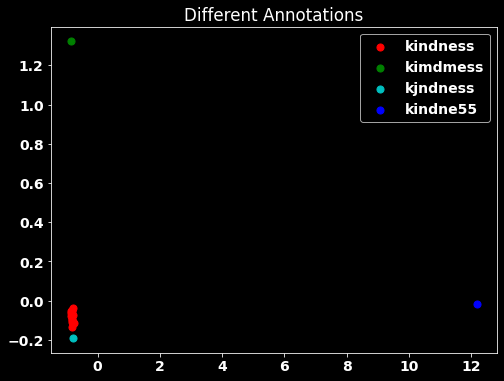

In [32]:
colormap = dict(zip(list(set(df[1])), mcolors.BASE_COLORS.keys()))

plt.figure(figsize=(8, 6))
for i, dot in enumerate(hee):
    name = df.loc[i, 1]
    
    # add jitter
    jdx = dot[0] + random.uniform(-.05, .05)
    jdy = dot[1] + random.uniform(-.05, .05)

    plt.scatter(jdx, jdy, c=colormap[name],label=name, s=50)

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.title('Different Annotations')
plt.show()

In [24]:
X = squareform(pdist(df[1].to_numpy().reshape(-1,1), lambda x, y: custom_metric(x[0], y[0])))
X

array([[0., 0., 0., 0., 0., 2., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2.],
       [0., 0., 0., 0., 0., 2., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2.],
       [0., 0., 0., 0., 0., 2., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2.],
       [0., 0., 0., 0., 0., 2., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2.],
       [0., 0., 0., 0., 0., 2., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2.],
       [2., 2., 2., 2., 2., 0., 2., 2., 2., 2., 2., 2., 2., 2., 3., 4.],
       [0., 0., 0., 0., 0., 2., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2.],
       [0., 0., 0., 0., 0., 2., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2.],
       [0., 0., 0., 0., 0., 2., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2.],
       [0., 0., 0., 0., 0., 2., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2.],
       [0., 0., 0., 0., 0., 2., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2.],
       [0., 0., 0., 0., 0., 2., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2.],
       [0., 0., 0., 0., 0., 2., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2.],
       [0., 0., 0., 0., 0., 2., 0., 0., 0., 0., 0.,

In [25]:
dbs = DBSCAN(metric='precomputed')
dbs.fit(X)

DBSCAN(metric='precomputed')

In [26]:
dbs.labels_

array([ 0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1])

In [27]:
df['evaluation'] = dbs.labels_
df

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,evaluation
0,kindness,kindness,10,8,13,3,13,4,18,18,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,0
1,kindness,kindness,10,8,13,3,13,4,18,18,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,0
2,kindness,kindness,10,8,13,3,13,4,18,18,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,0
3,kindness,kindness,10,8,13,3,13,4,18,18,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,0
4,kindness,kindness,10,8,13,3,13,4,18,18,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,0
5,kindness,kimdmess,10,8,12,3,12,4,18,18,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
6,kindness,kindness,10,8,13,3,13,4,18,18,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,0
7,kindness,kindness,10,8,13,3,13,4,18,18,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,0
8,kindness,kindness,10,8,13,3,13,4,18,18,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,0
9,kindness,kindness,10,8,13,3,13,4,18,18,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,0


In [28]:
df[[1, 'evaluation']]

,1,evaluation
0,kindness,0
1,kindness,0
2,kindness,0
3,kindness,0
4,kindness,0
5,kimdmess,-1
6,kindness,0
7,kindness,0
8,kindness,0
9,kindness,0


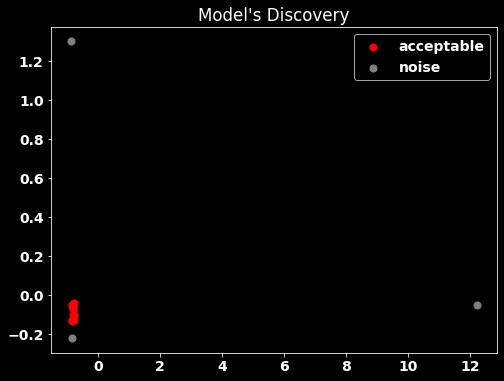

In [36]:
colormap = {0: 'r', -1: 'gray'}

plt.figure(figsize=(8, 6))
for i, dot in enumerate(hee):
    name = df.loc[i, 1]
    
    # add jitter
    jdx = dot[0] + random.uniform(-.05, .05)
    jdy = dot[1] + random.uniform(-.05, .05)

    plt.scatter(jdx, jdy, c=colormap[dbs.labels_[i]], label=('acceptable' if dbs.labels_[i] == 0 else 'noise'), s=50)
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.title("Model's Discovery")
plt.show()